# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# pip install citipy


# Import API key
# from config import api_keys
import api_keys

# 
# citipy = "https://pypi.python.org/pypi/citipy"
# https://openweathermap.org/api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
final_output_data_file = "output_data/cities_final.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [3]:
print(cities)

['san patricio', 'mataura', 'qaanaaq', 'sorland', 'tasiilaq', 'ushuaia', 'leningradskiy', 'athabasca', 'port elizabeth', 'bluff', 'cidreira', 'barrow', 'hermanus', 'kamenskoye', 'saskylakh', 'busselton', 'saint-donat-de-montcalm', 'port-cartier', 'salalah', 'bredasdorp', 'hobart', 'stoyba', 'anloga', 'tuktoyaktuk', 'rikitea', 'chuy', 'victoria point', 'dikson', 'atuona', 'puerto ayora', 'punta arenas', 'kodiak', 'illoqqortoormiut', 'torbay', 'mar del plata', 'nikolskoye', 'kieta', 'sampit', 'nantucket', 'mount gambier', 'adrar', 'pangkalanbuun', 'saint-augustin', 'omboue', 'aras', 'saleaula', 'havre-saint-pierre', 'alta floresta', 'batagay-alyta', 'punalur', 'tungor', 'lakselv', 'hobyo', 'nizhneyansk', 'labuhan', 'san andres', 'longyearbyen', 'vaini', 'belushya guba', 'sakakah', 'butaritari', 'hailar', 'severo-kurilsk', 'altamont', 'la joya', 'ambilobe', 'cacapava', 'albany', 'tura', 'hithadhoo', 'amderma', 'san lawrenz', 'makaha', 'matamoros', 'srednekolymsk', 'castro', 'saint-georges

In [13]:
### Saving out the city pull [swithcer between the full and 10]

# Switch the # between the next two lines to get ether all of the cities or just the first 10

# all cities
# cities_df = pd.DataFrame(cities, columns=["city"])

# Just the first 10 cities
cities_df = pd.DataFrame(cities[:10], columns=["city"])


# Creates the CSV file
cities_df.to_csv(output_data_file, header=True, index=False)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
import openweathermapy as owm
import csv
#config
from api_keys import api_key


# from urllib2 import HTTPError
from urllib.error import HTTPError

colnames = ['city']
data = pd.read_csv(output_data_file, names=colnames)
cities_list = data.city.tolist()

# removes the word Cities from our list
del cities_list[0]
# print(cities_list)

# Create settings dictionary with information we're interested in
# settings = {"units": "Fahrenheit", "appid": api_key}
# settings = {"appid": api_key, "&units=": "fahrenheit"}
settings = {"units": "imperial", "appid": api_key}
# &units=
# units = ["Fahrenheit"]

# query_url = "https://api.openweathermap.org/data/2.5/weather?q="

url = "https://api.openweathermap.org/data/2.5/weather?q="

# https://samples.openweathermap.org/data/2.5/weather?q=London
# https://samples.openweathermap.org/data/2.5/weather?q=
# London
# api.openweathermap.org/data/2.5/weather?q=London&appid=api_key

#-------------------------------------------------------------

name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxtemp = []
windspeed = []
i = 0

for city in cities_list:
    try:
        response = requests.get(url + city + "&units=imperial" + "&appid=" + api_key).json()
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        i = i + 1
        print(f"Processing Record {i} of {len(cities_list)} | {city}")
        time.sleep(1)
    except Exception as x:
#         print(x)
        print(f"City not found. Skipping ", city)
        pass

#     for index, city in cities_list.iterrows():
#     for city in cities_list.iterrows():
#         print(f"Processing Record ", str(row), " of ", len(cities), f" | ", city)
#         print(f"Processing Record ", [], " of ", len(cities), f" | ", city)
# except Exception:
# print("Oops, that city doesn't exist... skipping")    

# except KeyError:
# HTTPError: HTTP Error 404: Not Found
# except (KeyError, HTTPError, IndexError):
    

weather_data = pd.DataFrame({
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed})
weather_data    

# print(response)
#-------------------------------------------------------------



# weather_data = []
# with open("output_data/cities.csv") as cities_file:
#     cities_reader = csv.reader(cities_file)
#     cities = [city[0] for city in cities_reader]
#     weather_data = [owm.get_current(city, **settings) for city in cities]

# # print(weather_data)    


# summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed", "cod"]
# data = [response(*summary) for response in weather_data]

# weather_data = pd.DataFrame(data)
# # weather_data = pd.DataFrame(data, index=cities)
# weather_data.columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed", "cod"]

# # weather_data = pd.DataFrame(data, index=False)
# # weather_data


# # api.openweathermap.org/data/2.5/weather?q=balimo
# # https://samples.openweathermap.org/data/2.5/weather?q=London&appid=b6907d289e10d714a6e88b30761fae22





##########################################################################################
####################### NEEDS ERROR CHECKING FOR HTTPError: ~404 #########################
##########################################################################################

Processing Record 1 of 10 | san patricio
Processing Record 2 of 10 | mataura
Processing Record 3 of 10 | qaanaaq
Processing Record 4 of 10 | sorland
Processing Record 5 of 10 | tasiilaq
Processing Record 6 of 10 | ushuaia
Processing Record 7 of 10 | leningradskiy
Processing Record 8 of 10 | athabasca
Processing Record 9 of 10 | port elizabeth
Processing Record 10 of 10 | bluff


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Patricio,8,PY,1547304348,79,-26.98,-56.83,87.96,3.71
1,Mataura,64,NZ,1547304350,92,-46.19,168.86,45.39,2.71
2,Qaanaaq,0,GL,1547304351,99,77.48,-69.36,-22.92,5.95
3,Sorland,80,NO,1547304353,100,67.67,12.69,36.30,14.90
4,Tasiilaq,75,GL,1547301000,78,65.61,-37.64,17.60,12.75
5,Ushuaia,75,AR,1547301600,86,-54.81,-68.31,42.80,34.45
6,Leningradskiy,8,RU,1547304357,100,69.38,178.42,-17.97,8.52
7,Athabasca,8,CA,1547304335,63,54.72,-113.29,2.46,3.15
8,Port Elizabeth,1,US,1547301360,59,39.31,-74.98,27.50,5.82
9,Bluff,0,AU,1547304361,71,-23.58,149.07,73.34,10.98


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# weather_data = pd.DataFrame(data, columns=["City", "Cloudiness", 
#                                           "Country", "Date", 
#                                           "Humidity", "Lat", "Lng", 
#                                           "Max Temp", "Wind Speed", "cod"])
weather_data.to_csv(final_output_data_file, header=True, index=False)



In [7]:
weather_data.count()

City          10
Cloudiness    10
Country       10
Date          10
Humidity      10
Lat           10
Lng           10
Max Temp      10
Wind Speed    10
dtype: int64

In [8]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Patricio,8,PY,1547304348,79,-26.98,-56.83,87.96,3.71
1,Mataura,64,NZ,1547304350,92,-46.19,168.86,45.39,2.71
2,Qaanaaq,0,GL,1547304351,99,77.48,-69.36,-22.92,5.95
3,Sorland,80,NO,1547304353,100,67.67,12.69,36.30,14.90
4,Tasiilaq,75,GL,1547301000,78,65.61,-37.64,17.60,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

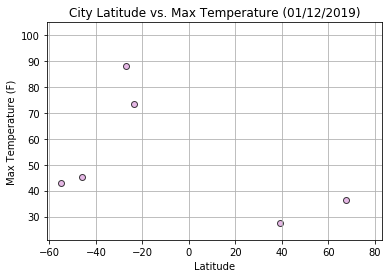

In [9]:
## Latitude vs. Temperature Plot

# Obtain the x and y coordinates for the plot
plt.ylim(21,105)
# plt.ylim(21,315)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Max Temp"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Max Temperature (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


##########################################################################################
#######################      NEEDS conversiton to Fahrenheit     #########################
############# When this happens change plt.ylim(21,315) back to plt.ylim(21,105) #########
##########################################################################################

plt.savefig("output_data/City_Latitude_vs_Max_Temperature.jpg", bbox_inches="tight")
plt.show()

#### Latitude vs. Humidity Plot

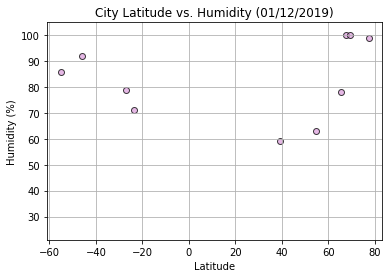

In [10]:
## Latitude vs. Humidity Plot

# Obtain the x and y coordinates for the plot
plt.ylim(21,105)
# plt.ylim(21,315)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Humidity"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Humidity (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/City_Latitude_vs_Humidity.jpg", bbox_inches="tight")
plt.show()

#### Latitude vs. Cloudiness Plot

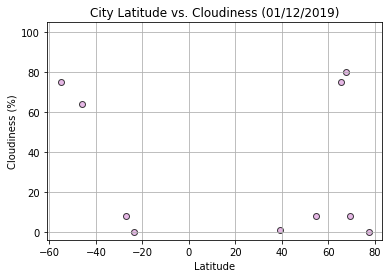

In [11]:
## Latitude vs. Cloudiness Plot

# Obtain the x and y coordinates for the plot
plt.ylim(-4,105)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Cloudiness"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Cloudiness (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/City_Latitude_vs_Cloudiness.jpg", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

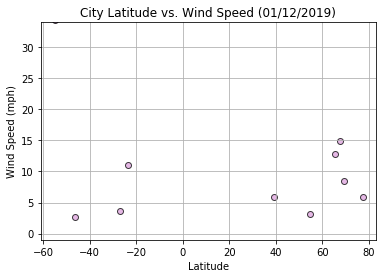

In [12]:
## Latitude vs. Wind Speed Plot

# Obtain the x and y coordinates for the plot
plt.ylim(-1,34)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Wind Speed"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Wind Speed (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/City_Latitude_vs_Wind_Speed.jpg", bbox_inches="tight")
plt.show()